In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
import tqdm as tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
train_df = pd.read_csv('timeseries_train.residuals.csv', index_col='Date', parse_dates=True)
train_df['DATE'] = pd.to_datetime(train_df['DATE'])

## Task: Visualize your residuals across time in your training data set.

    Visualize both across the whole training set as well as isolating the visual to one week (first week of December 2019 for example) to observe the patterns.
    Notice that there still appears to be a 24-hour “cycle” to your residuals.
    

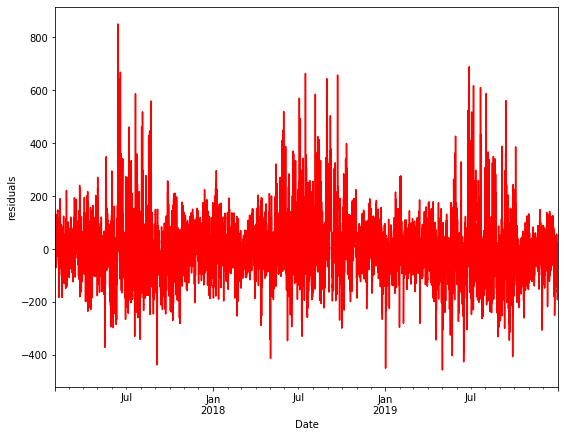

In [3]:
ax1 = train_df['residuals'].plot(color = 'red', figsize=(9,7))
ax1.set_ylabel('residuals')
ax1.set_xlabel('Date')
plt.show()

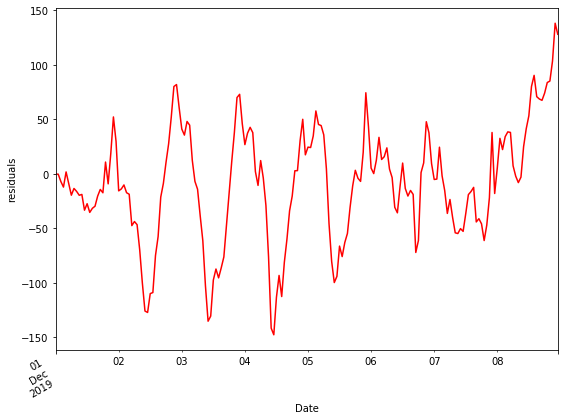

In [4]:
fig, ax = plt.subplots()
df = train_df['2019-12-01':'2019-12-08']
df['residuals'].plot(color = 'red', figsize=(9,7), ylabel='residuals', xlabel='Date', ax=ax)
fig.autofmt_xdate()
plt.show()

Build an Exponential Smoothing model on the residuals that does not incorporate trend but does incorporate a 24-hour seasonal effect.

    The statsmodels library in Python has some great functionality for this with the ExponentialSmoothing function.
    Obtain the predicted values of your residuals on your training data set from this model.
    Add these predicted residuals to your predictions of energy usage from your linear regression to obtain your new dynamic model’s energy predictions.
    Calculate the training MAPE from these new predictions. Notice any improvement?
    Forecast out the next 744 hours of residuals (the month of January 2020). Add these to your test data set prediction from the linear regression to obtain your January 2020 predictions.
 

In [5]:
train_df.head()

,DATE,mw,year,month,day,weekday,hour,temp,temp_norm,temp_norm2,fitted,APE,residuals
Date,,,,,,,,,,,,,
2017-02-01 05:00:00,2017-02-01 05:00:00,1419.881,2017,2,1,2,5,36,-0.924604,0.854893,1319.223068,7.089181,100.657932
2017-02-01 06:00:00,2017-02-01 06:00:00,1379.505,2017,2,1,2,6,36,-0.924604,0.854893,1296.861914,5.990778,82.643086
2017-02-01 07:00:00,2017-02-01 07:00:00,1366.106,2017,2,1,2,7,34,-1.030590,1.062116,1310.904512,4.040791,55.201488
2017-02-01 08:00:00,2017-02-01 08:00:00,1364.453,2017,2,1,2,8,33,-1.083583,1.174152,1342.516980,1.607679,21.936020
2017-02-01 09:00:00,2017-02-01 09:00:00,1391.265,2017,2,1,2,9,34,-1.030590,1.062116,1400.731175,0.680401,-9.466175


In [6]:
model_smoothing = ExponentialSmoothing(train_df['residuals'], trend=None, seasonal='add', seasonal_periods=24)
res_tes = model_smoothing.fit()
print(res_tes.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                25531
Model:             ExponentialSmoothing   SSE                       49842991.474
Optimized:                         True   AIC                         193493.743
Trend:                             None   BIC                         193705.582
Seasonal:                      Additive   AICC                        193493.807
Seasonal Periods:                    24   Date:                 Wed, 13 Jan 2021
Box-Cox:                          False   Time:                         12:28:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8421053                alpha                 True
smoothing_seasonal       

/Users/todd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/todd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [7]:
test_df = pd.read_csv('timeseries_test.preds.csv', index_col='DATE', parse_dates=True)
test_df.head()

,Date,mw,year,month,day,weekday,hour,temp,temp_norm,temp_norm2,preds,APE
DATE,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,1606.134,2020,1,1,2,0,30,-1.242562,1.543961,1702.942231,6.027407
2020-01-01 01:00:00,2020-01-01 01:00:00,1565.014,2020,1,1,2,1,31,-1.189569,1.415075,1657.110155,5.884686
2020-01-01 02:00:00,2020-01-01 02:00:00,1515.905,2020,1,1,2,2,29,-1.295555,1.678463,1608.919660,6.135916
2020-01-01 03:00:00,2020-01-01 03:00:00,1474.519,2020,1,1,2,3,30,-1.242562,1.543961,1520.572143,3.123265
2020-01-01 04:00:00,2020-01-01 04:00:00,1421.717,2020,1,1,2,4,30,-1.242562,1.543961,1447.235071,1.794877


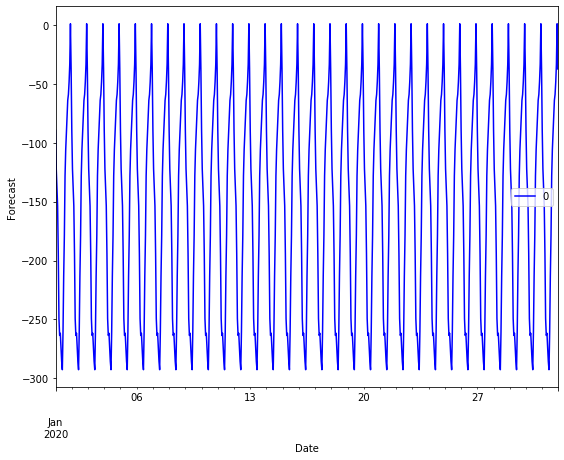

In [8]:
forecast = pd.DataFrame(res_tes.forecast(744))
forecast.index = test_df.index.copy()
ax1 = forecast.plot(color = 'blue', figsize=(9,7))
ax1.set_ylabel('Forecast')
ax1.set_xlabel('Date')
plt.show()

Training Naive + ESM Model MAPE is:  1.9589230611021824
Naive + ESM Model MAPE is:  7.710804651735274


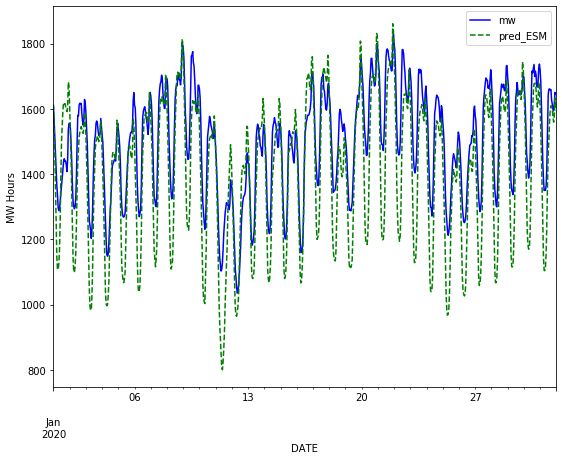

In [9]:
train_df['fitted_resid'] = res_tes.fittedvalues
train_df['fitted_ESM'] = train_df['fitted'] + train_df['fitted_resid']
train_df['APE_ESM'] = abs((train_df['mw'] - train_df['fitted_ESM']) / train_df['mw'])*100
print("Training Naive + ESM Model MAPE is: ", train_df['APE_ESM'].mean())

test_df['pred_resid'] = forecast
test_df['pred_ESM'] = test_df['preds'] + test_df['pred_resid']
test_df['APE_ESM'] = abs((test_df['mw'] - test_df['pred_ESM']) / test_df['mw'])*100
print("Naive + ESM Model MAPE is: ", test_df['APE_ESM'].mean())

test_df['mw'].plot(color = 'blue', figsize=(9,7))
plt.ylabel('MW Hours')
plt.xlabel('Date')
test_df['pred_ESM'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))
plt.legend(loc="best");
plt.show()

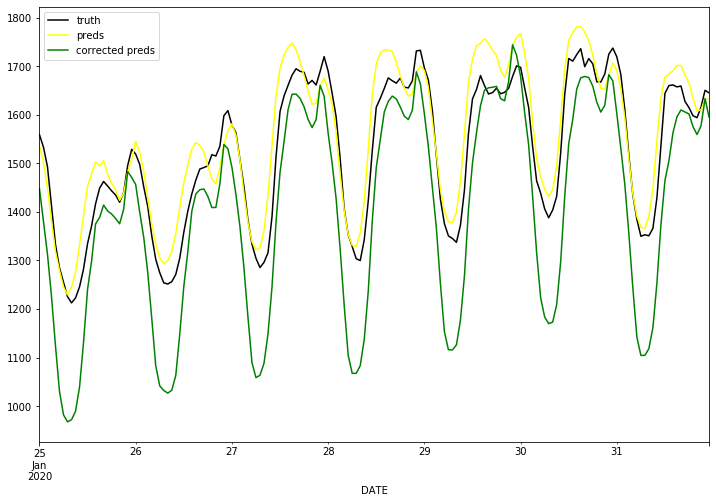

In [10]:
zoom = 24 * 7
test_df[-zoom:]['mw'].plot(legend=True, label='truth', color='black')
test_df[-zoom:]['preds'].plot(legend=True, label='preds', color='yellow')
test_df[-zoom:]['pred_ESM'].plot(legend=True, label='corrected preds', figsize=(12,8), color='green')

## So the graph above is interesting, it shows that the corrected predictions don't over estimate the expected values--which may be very valuable to a business, however there is a slight cost in that they underestimate and some of the valleys drop quite a bit.

Build a seasonal ARIMA model on the residuals that doesn’t incorporate trend but does incorporate a 24-hour seasonal effect.

The statsmodels library in Python has some great functionality for this with the SARIMAX function.
A good model to start with would have two autoregressive terms, one seasonal difference (remember that seasons are 24 hours), and one seasonal moving average term. This model is also called an ARIMA(2, 0, 0)(0, 1, 1, 24) model.
This is a good starting point. Feel free to play around by changing the model from there! 
Obtain the predicted values of your residuals on your training data set from this model.
Add these predicted residuals to your predictions of energy usage from your linear regression to obtain your new dynamic model’s energy predictions.
    Calculate the training MAPE from these new predictions. Notice any improvement over the naïve model? How about your previous exponential smoothing model?
    Forecast out the next 744 hours of residuals (the month of January 2020). Add these to your test data set prediction from the linear regression to obtain your January 2020 predictions.

In [11]:
sarima_model = SARIMAX(train_df['residuals'], order=(2,0,0), seasonal_order=(0,1,1,24))
res = sarima_model.fit(disp=False)
print(res.summary())

# smoothing made no difference
# span = 24 # The model will consider the last 24 hours weighted average for forecasting
# alpha = 2/(span+1)
# sarima_model.fit(smoothing_level=alpha)
# res = sarima_model.fit(disp=False)

/Users/todd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/todd/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            residuals   No. Observations:                25531
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood             -127810.017
Date:                              Wed, 13 Jan 2021   AIC                         255628.035
Time:                                      12:29:49   BIC                         255660.621
Sample:                                  02-01-2017   HQIC                        255638.572
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1174      0.003    375.371      0.000       1.112       1.123
ar.L2         -0.21

Training Naive + ARIMA Model MAPE is:  1.4687458299513025
Naive + ARIMA Model MAPE is:  4.006559666854861


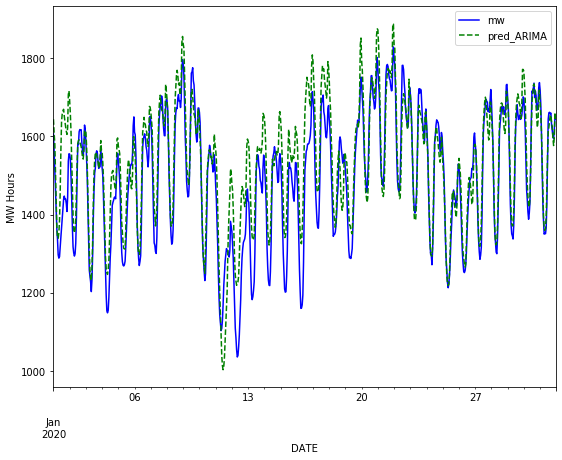

In [12]:
train_df['fitted_resid2'] = res.fittedvalues
train_df['fitted_ARIMA'] = train_df['fitted'] + train_df['fitted_resid2']
train_df['APE_ARIMA'] = abs((train_df['mw'] - train_df['fitted_ARIMA'])/train_df['mw'])*100
print("Training Naive + ARIMA Model MAPE is: ", train_df['APE_ARIMA'].mean())

forecast = pd.DataFrame(res.forecast(744))
forecast.index = test_df.index.copy()
test_df['pred_resid2'] = forecast
test_df['pred_ARIMA'] = test_df['preds'] + test_df['pred_resid2']
test_df['APE_ARIMA'] = abs((test_df['mw'] - test_df['pred_ARIMA']) / test_df['mw'])*100
print("Naive + ARIMA Model MAPE is: ", test_df['APE_ARIMA'].mean())

test_df['mw'].plot(color = 'blue', figsize=(9,7))
plt.ylabel('MW Hours')
plt.xlabel('Date')
test_df['pred_ARIMA'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))
plt.legend(loc="best");
plt.show()

### Ensembling

In [13]:
train_df['fitted_Ensemble'] = train_df['fitted'] + 0.5*train_df['fitted_resid'] + 0.5*train_df['fitted_resid2']
test_df['pred_Ensemble'] = test_df['preds'] + 0.5* test_df['pred_resid'] + 0.5*test_df['pred_resid2']

train_df['APE_Ensemble'] = abs((train_df['mw'] - train_df['fitted_Ensemble']) / train_df['mw'])*100
print("Training Naive + Ensemble Model MAPE is: ", train_df['APE_Ensemble'].mean())

test_df['APE_Ensemble'] = abs((test_df['mw'] - test_df['pred_Ensemble']) / test_df['mw'])*100
print("Naive + Ensemble Model MAPE is: ", test_df['APE_Ensemble'].mean())

Training Naive + Ensemble Model MAPE is:  1.616747847070708
Naive + Ensemble Model MAPE is:  4.274790083874659


In [14]:
test_df.to_csv('timeseries_test.preds.corrected.csv')